# Topic modeling - Initial Data import and preprocessing

In this project, we attempt to perform topic modeling on four data sets, three of which are merged to form a single dataset and one consisting of scraped articles from BBC website. 
In this part, we attempt to import the datasets obtained from https://www.kaggle.com/ and perform some basic EDA and visualizations.

### Packages Used

In [ ]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import spacy
from time import time
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Import of datasets 

In [2]:
data1 = pd.read_csv("articles1.csv", encoding='latin1')

In [3]:
data1.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,...,Unnamed: 845,Unnamed: 846,Unnamed: 847,Unnamed: 848,Unnamed: 849,Unnamed: 850,Unnamed: 851,Unnamed: 852,Unnamed: 853,Unnamed: 854
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,12/31/2016,2016,12,NaN,WASHINGTON â Congressional Republicans ha...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,6/19/2017,2017,6,NaN,"After the bullet shells get counted, the blood...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,17285,"Tyrus Wong, âBambiâ Artist Thwarted by Rac...",New York Times,Margalit Fox,1/6/2017,2017,1,NaN,When Walt Disneyâs âBambiâ opened in 194...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,4/10/2017,2017,4,NaN,"Death may be the great equalizer, but it isnâ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,1/2/2017,2017,1,NaN,"SEOUL, South Korea â North Koreaâs lead...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data2 = pd.read_csv("articles2.csv")

In [5]:
data2.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,53293,73471,Patriots Day Is Best When It Digs Past the Her...,Atlantic,David Sims,2017-01-11,2017.0,1.0,NaN,"Patriots Day, Peter Berg’s new thriller that r..."
1,53294,73472,A Break in the Search for the Origin of Comple...,Atlantic,Ed Yong,2017-01-11,2017.0,1.0,NaN,"In Norse mythology, humans and our world were ..."
2,53295,73474,Obama’s Ingenious Mention of Atticus Finch,Atlantic,Spencer Kornhaber,2017-01-11,2017.0,1.0,NaN,“If our democracy is to work in this increasin...
3,53296,73475,"Donald Trump Meets, and Assails, the Press",Atlantic,David A. Graham,2017-01-11,2017.0,1.0,NaN,Updated on January 11 at 5:05 p. m. In his fir...
4,53297,73476,Trump: ’I Think’ Hacking Was Russian,Atlantic,Kaveh Waddell,2017-01-11,2017.0,1.0,NaN,Updated at 12:25 p. m. After months of equivoc...


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50120 entries, 0 to 50119
Columns: 855 entries, Unnamed: 0 to Unnamed: 854
dtypes: float64(5), object(850)
memory usage: 326.9+ MB


In [42]:
data1.shape

(50120, 855)

We can see that these datasets have the same columns and also in the same order. Hence we append all the three datasets together and work on it as a whole.

In [8]:
data3 = pd.read_csv("articles3.csv")

In [9]:
data = data1.append(data2)

In [10]:
data.append(data3)

,Unnamed: 0,id,title,publication,author,date,year,month,url,content,...,Unnamed: 845,Unnamed: 846,Unnamed: 847,Unnamed: 848,Unnamed: 849,Unnamed: 850,Unnamed: 851,Unnamed: 852,Unnamed: 853,Unnamed: 854
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,12/31/2016,2016,12,NaN,WASHINGTON â Congressional Republicans ha...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,6/19/2017,2017,6,NaN,"After the bullet shells get counted, the blood...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,17285,"Tyrus Wong, âBambiâ Artist Thwarted by Rac...",New York Times,Margalit Fox,1/6/2017,2017,1,NaN,When Walt Disneyâs âBambiâ opened in 194...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,4/10/2017,2017,4,NaN,"Death may be the great equalizer, but it isnâ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,1/2/2017,2017,1,NaN,"SEOUL, South Korea â North Koreaâs lead...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42566,146028,218078,An eavesdropping Uber driver saved his 16-year...,Washington Post,Avi Selk,2016-12-30,2016,12,https://web.archive.org/web/20161231004909/htt...,Uber driver Keith Avila picked up a p...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42567,146029,218079,Plane carrying six people returning from a Cav...,Washington Post,Sarah Larimer,2016-12-30,2016,12,https://web.archive.org/web/20161231004909/htt...,Crews on Friday continued to search L...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42568,146030,218080,After helping a fraction of homeowners expecte...,Washington Post,Renae Merle,2016-12-30,2016,12,https://web.archive.org/web/20161231004909/htt...,When the Obama administration announced a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42569,146031,218081,"Yes, this is real: Michigan just banned bannin...",Washington Post,Chelsea Harvey,2016-12-30,2016,12,https://web.archive.org/web/20161231004909/htt...,This story has been updated. A new law in...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The combined dataset has 142690 rows and 855 columns. 

Now to find the Null values in the datasets.

In [44]:
data.isnull().sum()

Unnamed: 0           3
id                   3
title                6
publication          7
author           14911
                 ...  
Unnamed: 851    100118
Unnamed: 852    100118
Unnamed: 853    100118
Unnamed: 854    100118
id2                106
Length: 856, dtype: int64

Now we examine the size of the articles in the dataset. We take statistical summary of the article content.

In [12]:
lengths = pd.Series(data['content'].str.len())
print(lengths.describe())

count    100108.000000
mean       4053.986135
std        4389.325293
min           1.000000
25%        1723.000000
50%        3049.000000
75%        5102.000000
max      164658.000000
Name: content, dtype: float64


In [45]:
data.reset_index(drop=True, inplace=True)

We attempt to remove all abnormal values here by removing all the rows which have non numeric values for Id columns

In [46]:
for i in range(data.shape[0]):
    try:
        data.loc[i,'id2']= int(data.loc[i,'id'])
    except:
        data.loc[i,'id2']=np.nan

In [47]:
#removing rows with abnormal values in ID column
d2=data.loc[~data['id2'].isna()]
d2['id2'].describe()

count    100013.000000
mean      79463.737454
std       40545.921374
min        2016.000000
25%       43747.000000
50%       73462.000000
75%      119043.000000
max      151906.000000
Name: id2, dtype: float64

In [48]:
d2['id2'][d2['id2']]

id2
17283.0     35969.0
17284.0     35970.0
17285.0     35971.0
17286.0     35972.0
17287.0     35973.0
             ...   
151902.0        NaN
151903.0        NaN
151904.0        NaN
151905.0        NaN
151906.0        NaN
Name: id2, Length: 100013, dtype: float64

### Examining the data through visualizations

First, let us look at the article count of the publications listed in the dataset

In [49]:
d2 = d2.groupby("publication").filter(lambda x: len(x) > 1)

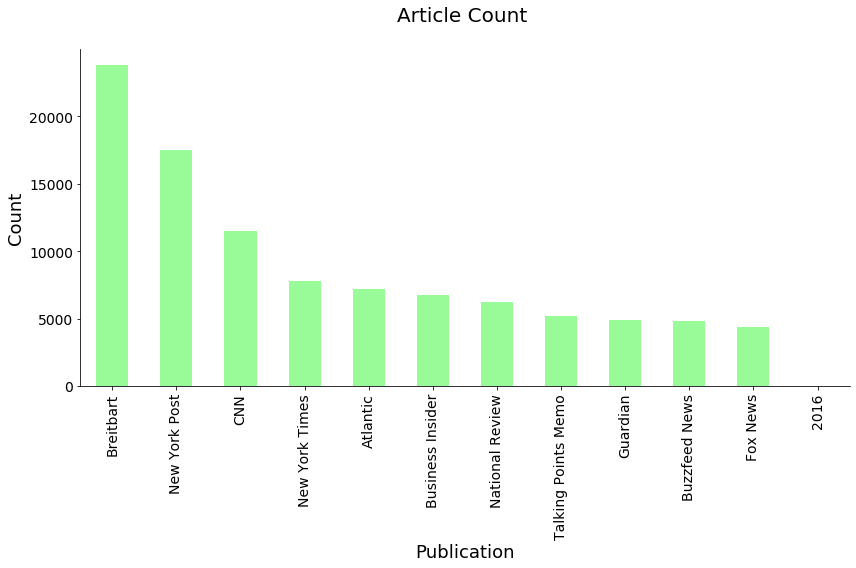

In [53]:
ax = d2['publication'].value_counts().plot(kind='bar', fontsize=14, figsize=(12,8), color="palegreen")
ax.set_title('Article Count \n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18)
plt.tight_layout()
sns.despine();

Looks like Breitbart has the most number of articles followed by New York Post

Let us now look at the trend of number of words in an article 

In [19]:
import string
def clean_text(d2):
    # removes punctuation and converts all the text to lower case
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", d2.lower())
    return re.sub(r'\W+', ' ', clean1)

d2['tokenized'] = d2['content'].map(lambda x: clean_text(x))
d2['num_words'] = d2['tokenized'].apply(lambda x: len(x.split()))

d2 = d2[d2['num_words']>0]

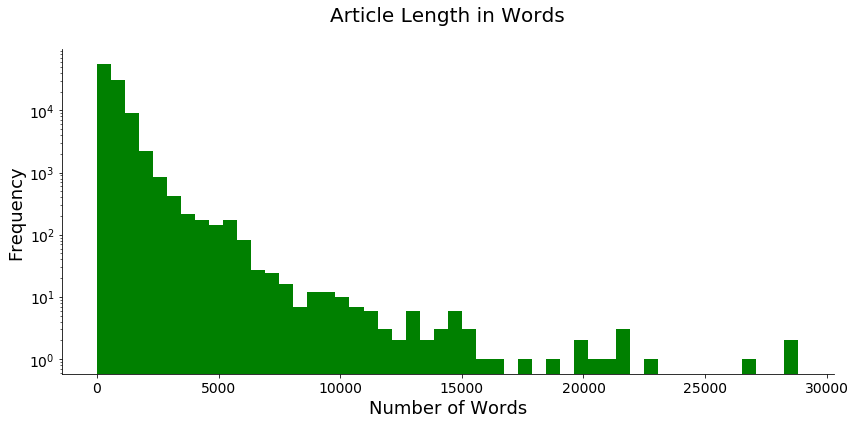

In [20]:
ax=d2['num_words'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="green")
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18)
ax.set_yscale("log")
plt.tight_layout()
sns.despine();

Unique words per article

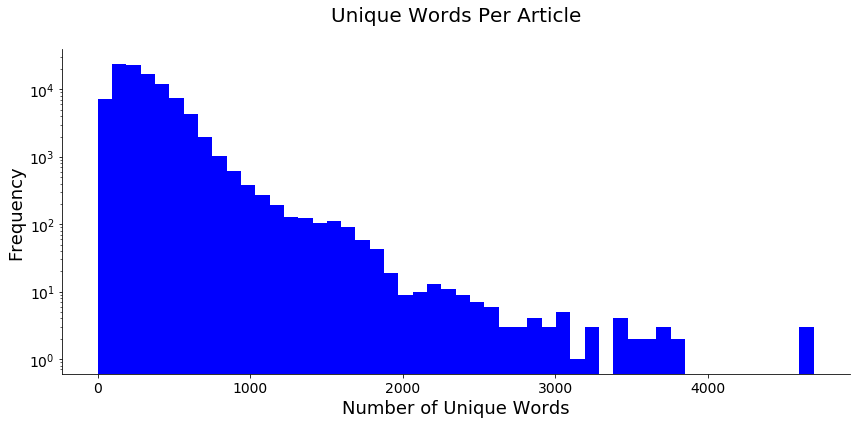

In [21]:
# number of unique words in each article
d2['unique_words'] = d2['tokenized'].str.split().apply(lambda x: len(set(x)))

ax=d2['unique_words'].plot(kind='hist', bins=50, fontsize=14, figsize=(12,6), color="blue")
ax.set_title('Unique Words Per Article\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18)
ax.set_yscale("log")
plt.tight_layout()
sns.despine();

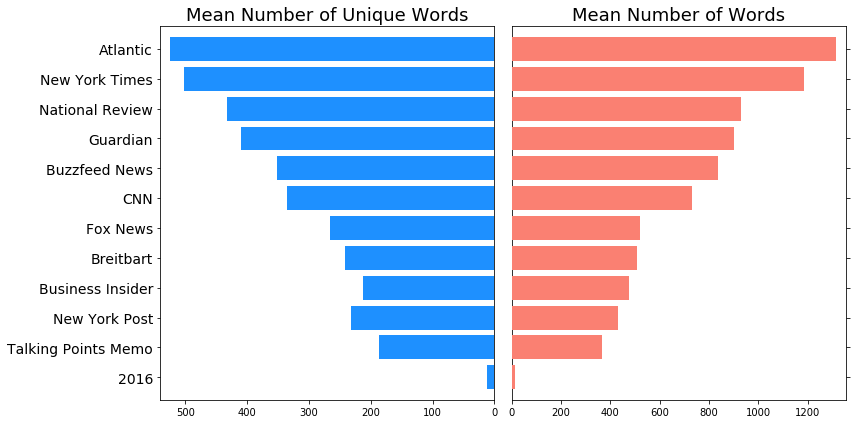

In [22]:
article_groups = d2.groupby('publication')

publications = article_groups['num_words'].aggregate(np.mean).index.tolist()
avg_words = article_groups['num_words'].aggregate(np.mean).values
unique_words = article_groups['unique_words'].aggregate(np.mean).values

# Sort by number of avg_words
idx = avg_words.argsort()
publications, avg_words, unique_words = [np.take(x, idx) for x in [publications, avg_words, unique_words]]

y = np.arange(unique_words.size)

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,6))
axes[0].barh(y, unique_words, align='center', color='dodgerblue', zorder=10)
axes[0].set_title('Mean Number of Unique Words', fontsize=18)
axes[1].barh(y, avg_words, align='center', color='salmon', zorder=10)
axes[1].set_title('Mean Number of Words', fontsize=18)

axes[0].invert_xaxis()
axes[0].set_yticks(y)
axes[0].set_yticklabels(publications, fontsize=14)
axes[0].yaxis.tick_left()

axes[1].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(False)

fig.tight_layout()
fig.subplots_adjust(wspace=0)
plt.tight_layout();

Atlantic publication articles have more number of unique words in average than any other publications.
It closely followed, however by New York Times and then National Review.

In [23]:
#creating a corpus for all authors in the dataset
names = d2.author.value_counts()[data.author.value_counts()].index.tolist()

#dataframes with the authors and the articles for creating the corpus
author_articles = pd.DataFrame()

for name in names:
    articles = d2[data.author == name][['title', 'content', 'author']]
    author_articles = author_articles.append(articles)

author_articles = author_articles.reset_index().drop('index',1)
author_articles.head()

,title,content,author
0,"Vivian Howard, a TV Chef, Offers Hope for Her ...","KINSTON, N. C. â Just before Christmas, i...",Kim Severson
1,Tucson Becomes an Unlikely Food Star - The New...,"TUCSON â There are food deserts, those ur...",Kim Severson
2,When Is Peach Season? Itâs a Bit Fuzzy - The...,"Kathleen Purvis, the Southern food writer most...",Kim Severson
3,Why Christopher Kimball Is Moving On From Amer...,BOSTON â Christopher Kimball spent much o...,Kim Severson
4,11 Ideas for Midweek Cooking - The New York Times,"Kim Severson is filling in for Sam Sifton, who...",Kim Severson


In [24]:
len(author_articles.index)

9072507

In [25]:
len(np.unique(author_articles.index))

9072507

In [26]:
len(np.unique(author_articles.author))

224

In [27]:
print(author_articles.author.value_counts())

Pam Key             6463844
Associated Press    1148961
Charlie Spiering     385120
Jerome Hudson        213590
John Hayward         153882
                     ...   
Elle Hunt                17
Brooke Singman           13
Sarah Jorgensen           9
Rachael Krishna           8
Kim Severson              6
Name: author, Length: 224, dtype: int64


### Statistical summary of the article data

In [28]:
print("Statistical summary of article data")
art_length = pd.Series([len(x) for x in author_articles.content])
print(art_length.describe())

Statistical summary of article data
count    9.072507e+06
mean     1.779148e+03
std      1.746469e+03
min      6.000000e+00
25%      8.570000e+02
50%      1.327000e+03
75%      2.046000e+03
max      1.646580e+05
dtype: float64


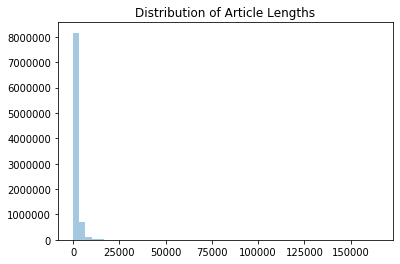

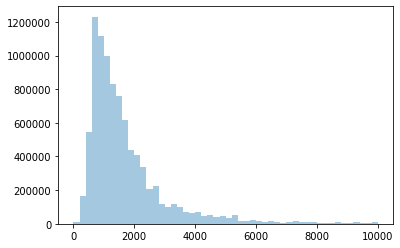

In [29]:
sns.distplot(art_length,kde=False)
plt.title('Distribution of Article Lengths')
plt.show()

sns.distplot(art_length[art_length<10000],kde=False)
plt.show()